In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
#Read the “housing.csv” file from the folder into the program.
df=pd.read_excel("1553768847_housing.xlsx")

In [64]:
#Print first few rows of this data.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [65]:
df.ndim

2

In [66]:
df.size

206400

In [67]:
df.shape

(20640, 10)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [69]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [70]:
#Fill the missing values with the mean of the respective column.
df["total_bedrooms"].fillna(df["total_bedrooms"].mean(),inplace=True)

In [71]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

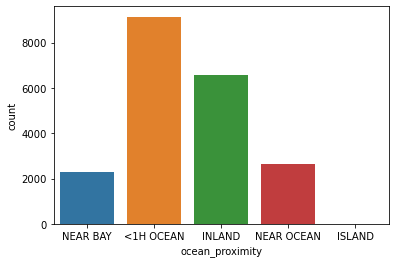

In [72]:
sns.countplot(x='ocean_proximity',data=df)

In [73]:
#Convert categorical column in the dataset to numerical data.
df2=pd.get_dummies(df.ocean_proximity)
df2.head(2)

df=pd.concat([df,df2],1)
df=df.drop('ocean_proximity',axis=1)
df.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,0,1,0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,0,0,0,1,0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,0,0,0,1,0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,0,0,0,1,0


In [74]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
<1H OCEAN               uint8
INLAND                  uint8
ISLAND                  uint8
NEAR BAY                uint8
NEAR OCEAN              uint8
dtype: object

In [75]:
def del_outlier(columns, data):
    for column_name in columns:
        fig=plt.figure(figsize=(16,4))
        sns.boxplot(x = data[column_name])
        plt.show()

        q1 = data[column_name].quantile(0.25)
        q2 = data[column_name].quantile(0.50)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1

        min_val = q1 - 1.5 * iqr
        max_val = q3 + 1.5 * iqr
        data[column_name] = np.where(data[column_name]  > max_val, q2, data[column_name] )
        data[column_name] = np.where(data[column_name]  < min_val, q2, data[column_name] )  

    return data  


#new_data =  del_outlier(df.drop(['longitude','latitude','total_bedrooms','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'], axis=1).columns, df)

new_data=df

In [76]:
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [77]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(4), int64(5), uint8(5)
memory usage: 1.5 MB


In [78]:
#Extract input (X) and output (Y) data from the dataset.
X = new_data.drop(['median_house_value','longitude','latitude'],axis=1)
y = new_data['median_house_value']

In [79]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [80]:
y.head(2)

0    452600
1    358500
Name: median_house_value, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

In [92]:
#Split the data into 80% training dataset and 20% test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 20)

In [93]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6441,30,2773,634.0,1376,540,2.7857,0,1,0,0,0
1455,7,3418,740.0,1583,676,3.6133,0,1,0,0,0
78,23,1745,374.0,1054,325,0.8026,0,0,0,1,0
9382,27,2682,382.0,935,369,10.0791,0,0,0,1,0
19409,24,527,112.0,270,112,1.6172,0,1,0,0,0


In [94]:
X_train.shape

(14448, 11)

In [95]:
X_test.shape

(6192, 11)

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()

#mc = MinMaxScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [97]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [98]:
X_train[:2]

array([[ 0.11210945,  0.06461926,  0.23009419, -0.04375666,  0.10366797,
        -0.57306894, -0.89651844,  1.47799971, -0.01664126, -0.35351209,
        -0.38486959],
       [-1.70997887,  0.36319025,  0.48486879,  0.14267665,  0.46036823,
        -0.13959446, -0.89651844,  1.47799971, -0.01664126, -0.35351209,
        -0.38486959]])

In [99]:
X_test[:2]

array([[-0.28399671,  0.20487819,  0.76367873,  1.30000418,  0.65970073,
        -0.63791203,  1.11542602, -0.67659012, -0.01664126, -0.35351209,
        -0.38486959],
       [-1.70997887, -0.30570136, -0.5053872 , -0.34006854, -0.51793468,
         1.23305724,  1.11542602, -0.67659012, -0.01664126, -0.35351209,
        -0.38486959]])

In [100]:
model.fit(X_train,X_test)

ValueError: Found input variables with inconsistent numbers of samples: [14448, 6192]